# Análisis de Naive Bayes 

In [75]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### Variables a usar 

In [76]:
# Variables usadas
vars_ = [
    'VIC_EDAD', 'VIC_ESCOLARIDAD',
    'VIC_OCUP', 'VIC_DEDICA', 'VIC_TRABAJA',
    'AGR_EDAD', 'AGR_ESCOLARIDAD',
    'AGR_OCUP', 'AGR_DEDICA', 'AGR_TRABAJA',
    'VIC_REL_AGR', 'HEC_TIPAGRE',
    'DEPTO_MCPIO', 'HEC_DEPTOMCPIO'
]
target = 'INST_DONDE_DENUNCIO'

In [77]:
mapping = {
    '1': 'PNC',
    '2': 'Ministerio Público',
    '3': 'Municipalidad',
    '4': 'Casa de Justicia',
    '5': 'Comisaría',
    '6': 'Centro Integrado',
    '9': 'Otro',
}

### Carga y limpieza

In [78]:
df = pd.read_csv("../CSV/UnidoPorAñoCSV/vif_all_years.csv")
df[target] = df[target].astype(str).str.strip()
df = df[df[target].isin(mapping.keys())]  

C:\Users\ncast\AppData\Local\Temp\ipykernel_14940\567477777.py:1: DtypeWarning: Columns (0,3,7,8,9,10,11,12,15,16,17,19,28,29,31,33,38,42,43,45,48,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../CSV/UnidoPorAñoCSV/vif_all_years.csv")


### Mapeo por nombres

In [79]:
df['denuncia_nombre'] = df[target].map(mapping)

### Separación de variables 

In [80]:
X = df[vars_].copy()
y = df['denuncia_nombre']

### Codificación de variables categóricas 

In [81]:
label_encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

### Train y Test 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1234)

### Entrenamiento de modelo 

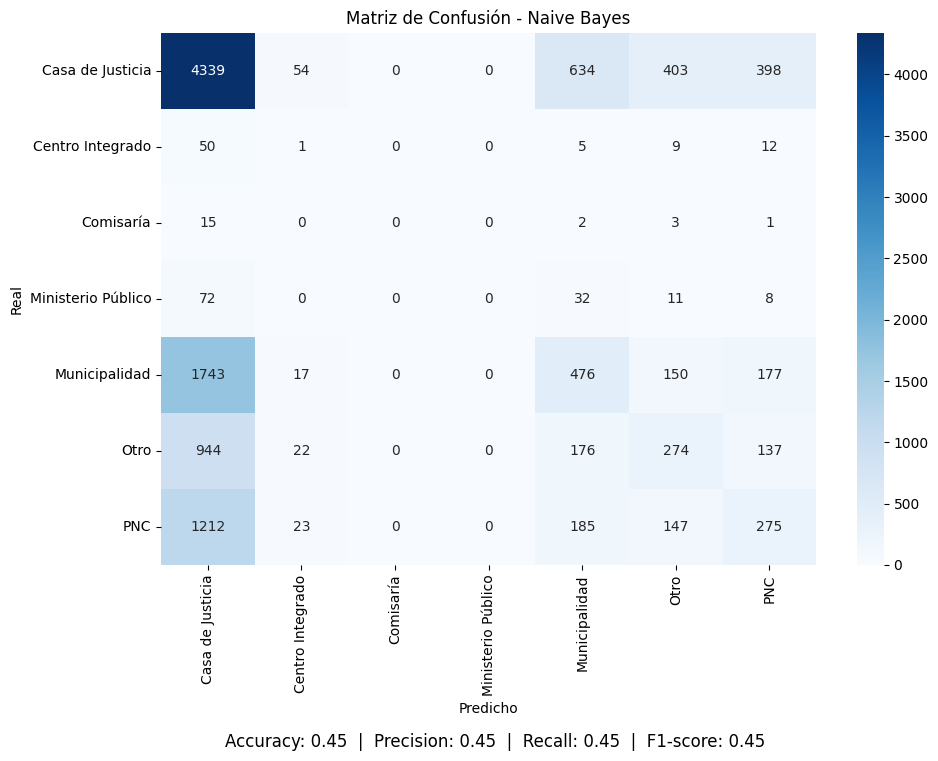

In [86]:
# Entrenar y predecir
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Matriz de confusión
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Crear figura
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Naive Bayes')

# Agregar texto con métricas en la misma figura
plt.figtext(0.5, 0.01,
            f'Accuracy: {accuracy:.2f}  |  Precision: {precision:.2f}  |  Recall: {recall:.2f}  |  F1-score: {f1:.2f}',
            wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # deja espacio para el texto abajo
plt.show()